### Importando as tabelas de dados para dataframe

In [461]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
df_names = ['df_categoria', 'df_item','df_pais','df_regiao','df_perda','df_producao','df_item_pais']

In [4]:
df_filenames = ['df_categoria.pkl', 'df_item.pkl','df_pais.pkl','df_regiao.pkl',
                'df_perda.pkl','df_producao.pkl','df_item_pais.pkl']

In [5]:
id = 0
for df in df_filenames:
   vars()[df_names[id]] = pd.read_pickle(df)
   id += 1

In [391]:
df_item.head()

,id,nome,categoria_id1
0,1,Trigo e produtos,4
1,2,Arroz e produtos,4
2,3,Cevada e produtos,4
3,4,Milho e produtos,4
4,5,Centeio e produtos,4


### Selecionando uma amostra do total de dados

Aqui estamos limitando os dados que serão utilizados na criação do grafo, uma vez que no total o dataframe de produção por examplo possui mais de 10 mil linhas. Um número muito grande de elementos num mesmo grafo dificulta a visualização das informações que queremos mostrar. Assim, optou-se pela construção do grafo com dados limitados a um mesmo ano e a uma categoria de itens dentre as quatro existentes. Podemos repetir os códigos de criação de um grafo para formar cada um dedicado exclusivamente à um ano específico. Assim, o objetivo se foca em comparar os números de produção entre os países e não em relação aos dados temporais.

In [7]:
#Adicionando os nomes ao invés dos ids para facilitar a criação das arestas
for idx in df_perda.index:
    df_perda.loc[idx, 'item_id1'] =  df_item.loc[df_perda.loc[idx, 'item_id1'] - 1, 'nome']
    df_perda.loc[idx, 'pais_id_pais'] =  df_pais.loc[df_perda.loc[idx, 'pais_id_pais'] - 1, 'nome']

In [8]:
for idx in df_producao.index:
    df_producao.loc[idx, 'item_id1'] =  df_item.loc[df_producao.loc[idx, 'item_id1'] - 1, 'nome']
    df_producao.loc[idx, 'pais_id_pais'] =  df_pais.loc[df_producao.loc[idx, 'pais_id_pais'] - 1, 'nome']

Abaixo estamos filtrando os dados pela categoria 4 que representa os Graõs e Cereais

In [9]:
df_producao_4 = df_producao[df_producao['item_id1'].isin(df_item[df_item['categoria_id1'] == 4]['nome'])]

In [445]:
df_producao_4

,id,peso,item_id1,pais_id_pais,ano
0,1,12601,Trigo e produtos,Argentina,1998
1,2,15479,Trigo e produtos,Argentina,1999
2,3,16147,Trigo e produtos,Argentina,2000
3,4,15428,Trigo e produtos,Argentina,2001
4,5,12399,Trigo e produtos,Argentina,2002
...,...,...,...,...,...
11667,11668,47,Café e produtos,Venezuela,2017
11668,11669,23,Grãos de cacau e produtos,Venezuela,2014
11669,11670,24,Grãos de cacau e produtos,Venezuela,2015
11670,11671,23,Grãos de cacau e produtos,Venezuela,2016


Filtrando os dados de produção por ano

In [453]:
df_producao_2017 = df_producao_4[df_producao_4['ano'] == 2017]
df_producao_2017

,id,peso,item_id1,pais_id_pais,ano
9171,9172,18410,Trigo e produtos,Argentina,2017
9175,9176,1328,Arroz e produtos,Argentina,2017
9179,9180,3741,Cevada e produtos,Argentina,2017
9183,9184,49476,Milho e produtos,Argentina,2017
9187,9188,79,Centeio e produtos,Argentina,2017
...,...,...,...,...,...
11605,11606,0,Ervilhas,Venezuela,2017
11612,11613,8,Grãos de Soja,Venezuela,2017
11616,11617,2,Amendoim (Eq sem casca),Venezuela,2017
11667,11668,47,Café e produtos,Venezuela,2017


A seguir é calculado o total produzido de cada alimento. Assim, utilizamos esse valor para modificar o tamanho dos vértices. Quanto maior o vértice representando um tipo de alimento maior o total produzido daquele alimento (considerando o total no ano somando todos os países da América Latina).

In [82]:
df_total_item_2017 = df_producao_2017[['item_id1', 'peso']].groupby(['item_id1']).sum().reset_index()
df_total_item_2017

,item_id1,peso
0,Amendoim (Eq sem casca),2031
1,Arroz e produtos,26950
2,Aveia,2286
3,Café e produtos,5057
4,Centeio e produtos,90
5,Cereais e outros,587
6,Cevada e produtos,5803
7,Ervilhas,226
8,Feijão,6008
9,Grãos de Soja,186888


## Criando os grafos


In [459]:
G = nx.Graph()
for idx in df_pais.index:
    G.add_node(df_pais.loc[idx, 'nome'], 
               nodetype='pais', 
               color='#00CED1')
for idx in df_item.index:
    G.add_node(df_item.loc[idx, 'nome'], 
               nodetype='item', 
               color='#F08080')
for idx in df_producao.index:
    G.add_edge(df_producao.loc[idx, 'item_id1'],
               df_producao.loc[idx, 'pais_id_pais'], 
               color='pink',
               frequency = 1)

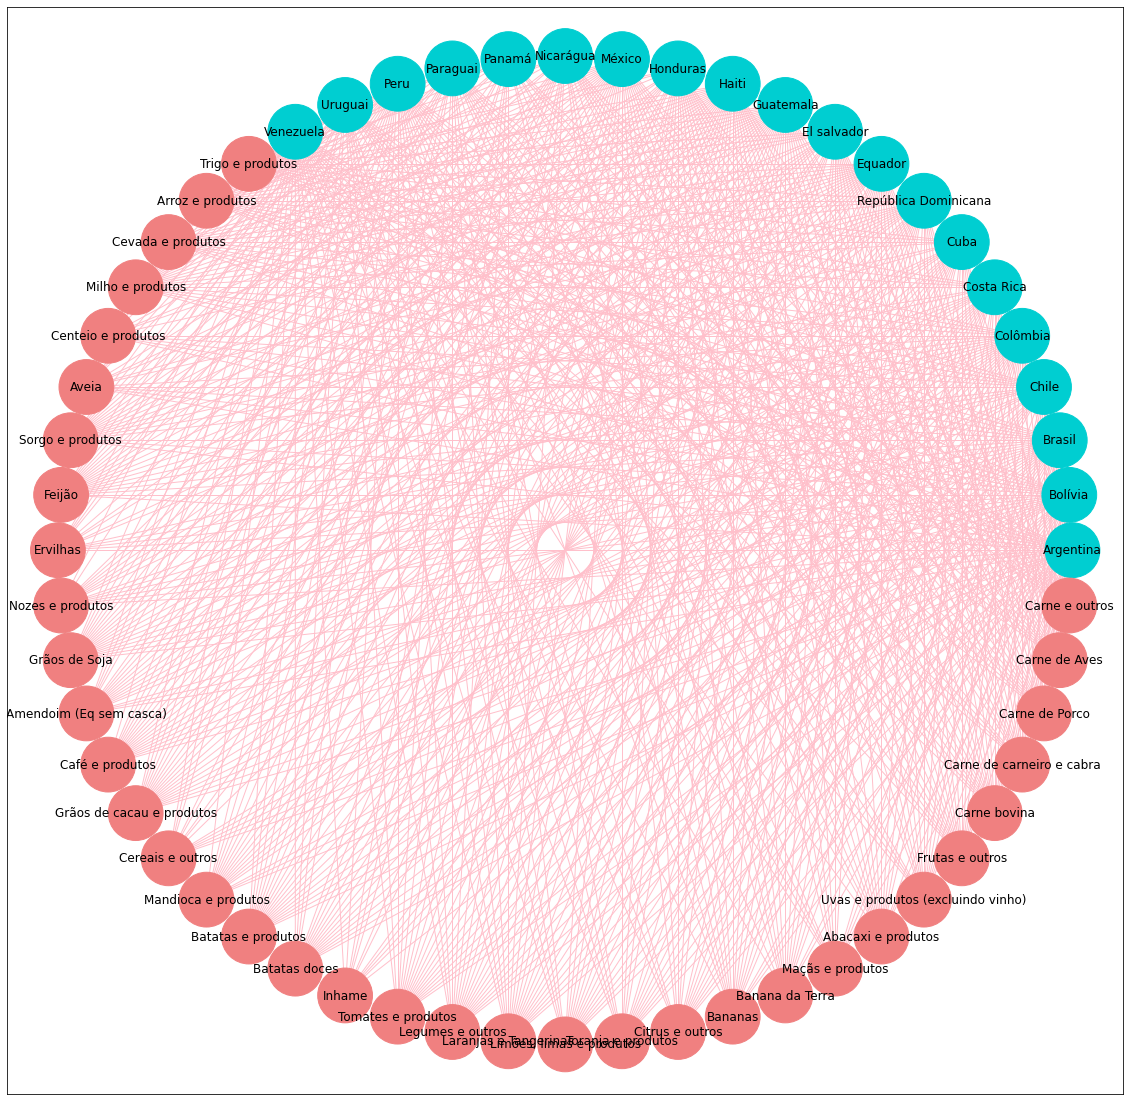

In [460]:
pos = nx.drawing.layout.circular_layout(G)
fig, ax = plt.subplots(figsize=(20,20))
nx.draw_networkx(G,
                pos = pos, 
                node_color = [nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                node_size = 3000,
                edge_color=[nx.get_edge_attributes(G,'color')[g] for g in G.edges()]) 

Podemos notar que a visualização acima, apesar de ser uma figura interessante não nos diz quase nada sobre 
perguntas que queremos responder considerando o banco de dados que temos. G aqui tem todos os países, todos
os itens e as arestas não possuem a informação do ano.

### Criando o grafo de produção de grãos e cereais no ano de 2017

In [325]:
G2017 = nx.Graph()
pos = [(16, 30), (47, 26), (49,11), (62,19), (64,60), (87, 24), (93,53), (10,75), (98,78), 
       (100, 20), (13,20), (15, 5), (50, 40), (60, 40), (80, 70)]
for idx in df_pais.index:
    G2017.add_node(df_pais.loc[idx, 'nome'], 
               nodetype='pais', 
               color='#00CED1',
               node_size = 3000,
               pos = (40, idx*4))
for idx in df_item[df_item['categoria_id1'] == 4].index:
    posx = pos[idx][0]
    posy = pos[idx][1]
    item = df_item[df_item['categoria_id1'] == 4].loc[idx, 'nome']
    G2017.add_node(item, 
               nodetype='item', 
               color='#F08080',
               pos = (posx, posy),
               node_size = 0.1*df_total_item_2017.loc[df_total_item_2017[df_total_item_2017['item_id1'] == item].index.item(), 'peso'])
for idx in df_producao_2017.index:
    if (df_producao_2017.loc[idx, 'peso'] < 50):
        color1 = '#FBE7C6'
    elif (df_producao_2017.loc[idx, 'peso'] in range(50, 200)) :
        color1 = 'pink'
    else:
        color1 = '#A0E7E5'
    G2017.add_edge(df_producao_2017.loc[idx, 'item_id1'],
               df_producao_2017.loc[idx, 'pais_id_pais'], 
               color= color1,
               frequency = 1,
               weight = df_producao_2017.loc[idx, 'peso'])

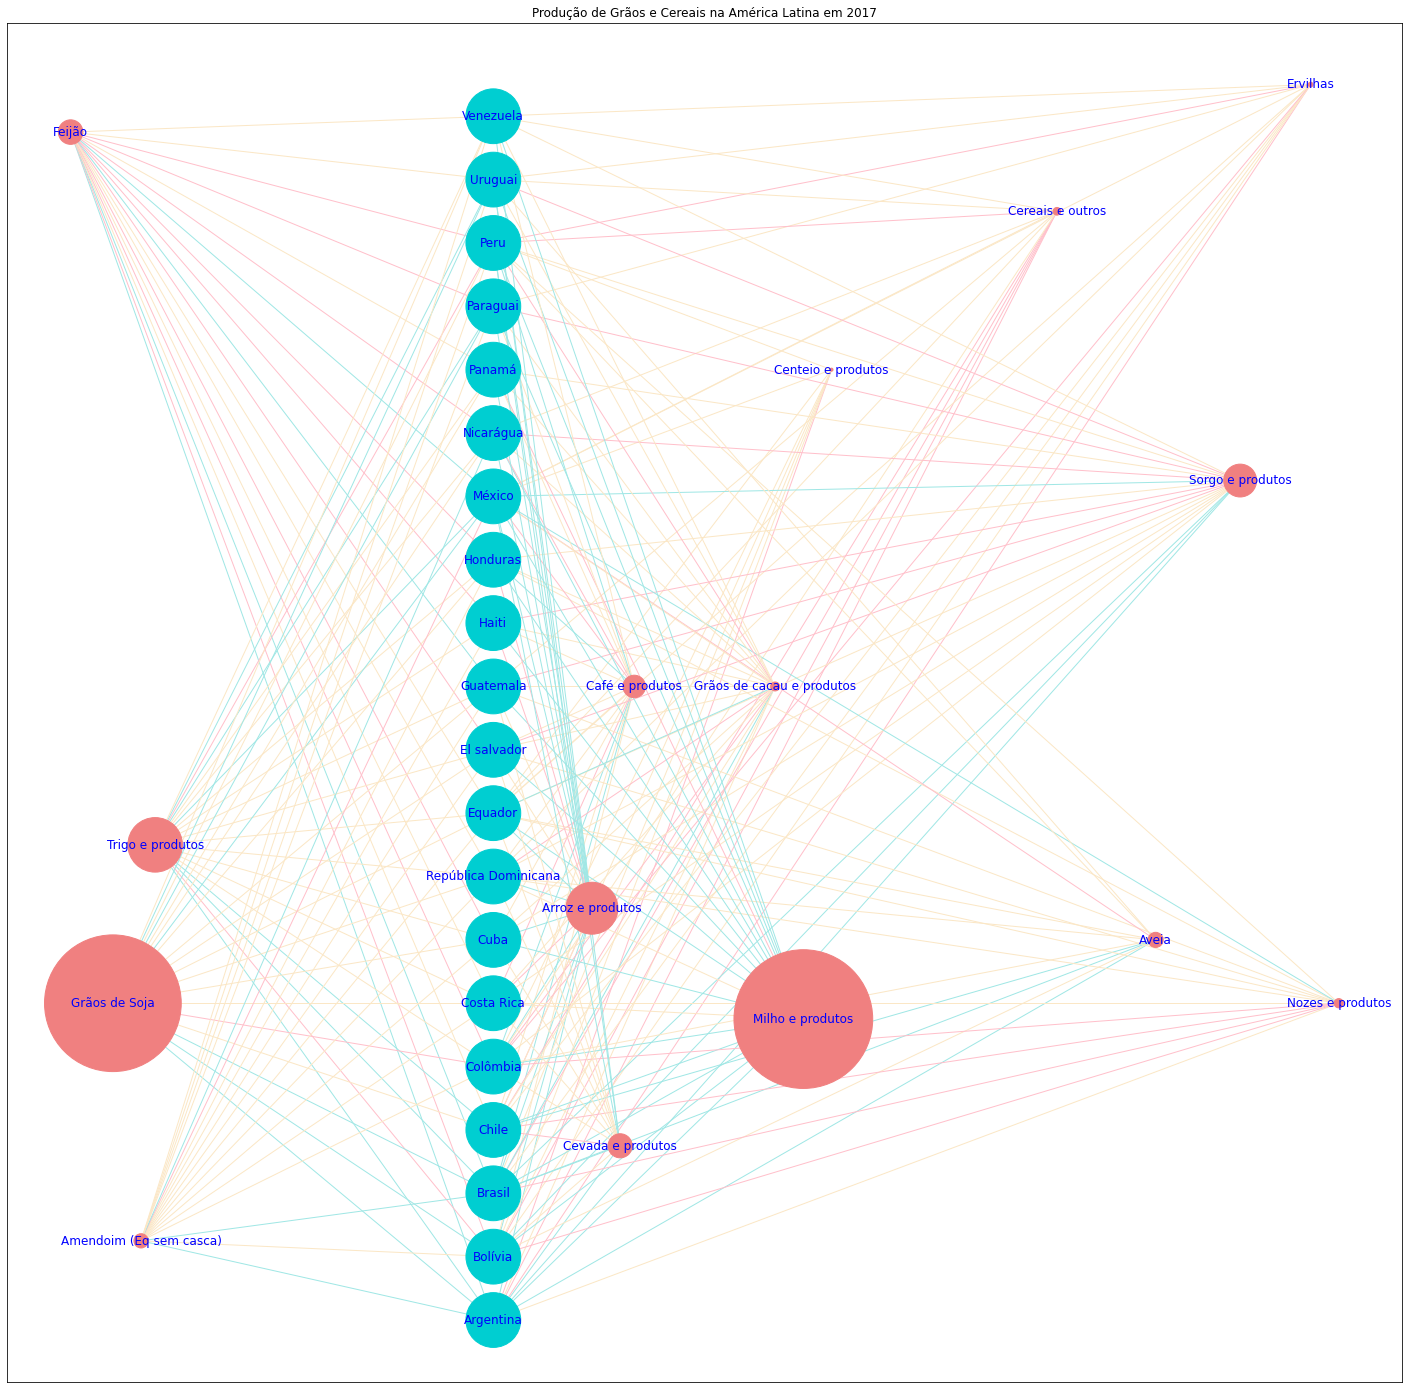

In [326]:
fig, ax = plt.subplots(figsize=(25,25))
#pos = nx.spring_layout(G2017, scale=1)
pos= nx.get_node_attributes(G2017,'pos')

ax.set_title('Produção de Grãos e Cereais na América Latina em 2017')
nx.draw_networkx(G2017,
                pos = pos,
                node_color = [nx.get_node_attributes(G2017,'color')[g] for g in G2017.nodes()],
                node_size = [nx.get_node_attributes(G2017,'node_size')[g] for g in G2017.nodes()],
                node_shape='o',
                edge_color=[nx.get_edge_attributes(G2017,'color')[g] for g in G2017.edges()],
                #width = [nx.get_edge_attributes(G2017,'weight')[g] for g in G2017.edges()],
                font_color='blue',
                font_family='sans-serif')

Acima se encontra o grafo de produção de grãos na América Latina no ano de 2017. Além do tamanho dos nós, foi adicionado um parâmetro que determina a cor da aresta de acordo com o intervalo onde se encontra o peso do que foi produzido daquele item num determinado país. Se a aresta é amarela, isso significa que o total produzido é menor do que 50 unidade, rosa se o total está no intervalo [30, 200) e azul caso contrário. (Lembrando que a unidade aqui se refere à 1000 toneladas).

Também foi criada uma lista de posições de modo que um vértice não sobrepõe outro.

### Criando o grafo de produção de grãos e cereais para o ano de 1998

Basicamente repetimos os passos utilizados anteriormente para criar o grafo referente a produção de grãos e cereais na América Latina no ano de 1998.

O interessante é que podemos então fazer comparações e perguntas que podem ser visualmente respondidas de maneira rápida, por exemplo: o produto mais produzido em 2017 é o mesmo que foi mais produzido em 1998?

In [447]:
df_producao_1998 = df_producao_4[df_producao_4['ano'] == 1998]
df_total_item_1998 = df_producao_1998[['item_id1', 'peso']].groupby(['item_id1']).sum().reset_index()

In [449]:
def criando_grafo(df_producao_ano, df_total_item_ano, pos, categoria):
    grafo = nx.Graph()
    for idx in df_pais.index:
        grafo.add_node(df_pais.loc[idx, 'nome'], 
               nodetype='pais', 
               color='#00CED1',
               node_size = 3000,
               pos = (40, idx*4))
    for idx in df_item[df_item['categoria_id1'] == categoria].index:
        posx = pos[idx][0]
        posy = pos[idx][1]
        item = df_item[df_item['categoria_id1'] == categoria].loc[idx, 'nome']
        grafo.add_node(item, 
               nodetype='item', 
               color='#F08080',
               pos = (posx, posy),
               node_size = 0.1*df_total_item_ano.loc[df_total_item_ano[df_total_item_ano['item_id1'] == item].index.item(), 'peso'])
    for idx in df_producao_ano.index:
        if (df_producao_ano.loc[idx, 'peso'] < 50):
            color1 = '#FBE7C6'
        elif (df_producao_ano.loc[idx, 'peso'] in range(50, 200)) :
            color1 = 'pink'
        else:
            color1 = '#A0E7E5'
        grafo.add_edge(df_producao_ano.loc[idx, 'item_id1'],
               df_producao_ano.loc[idx, 'pais_id_pais'], 
               color= color1,
               frequency = 1,
               weight = df_producao_ano.loc[idx, 'peso'])
    return grafo

In [450]:
pos = [(16, 30), (47, 26), (49,11), (62,19), (64,60), (87, 24), (93,53), (10,75), (98,78), 
       (100, 20), (13,20), (15, 5), (50, 40), (60, 40), (80, 70)]
G1998 = criando_grafo(df_producao_1998, df_total_item_1998, pos, 4)

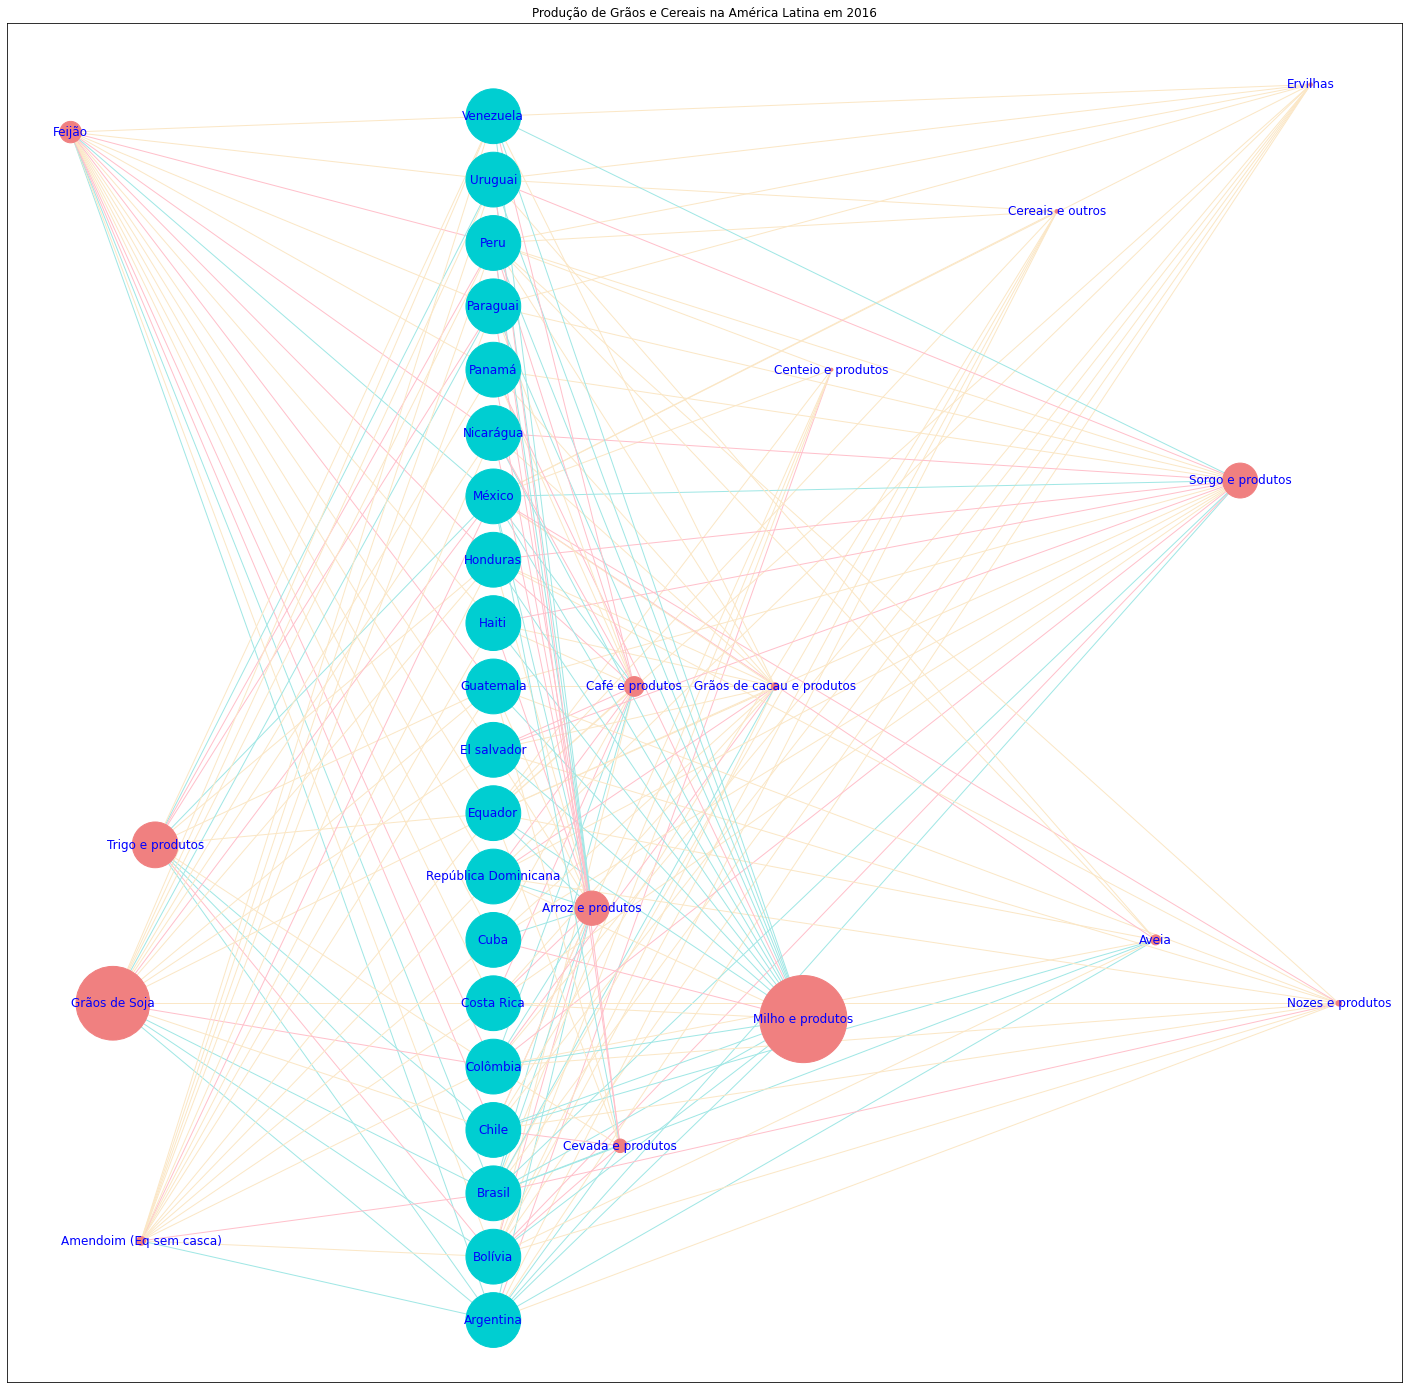

In [451]:
fig, ax = plt.subplots(figsize=(25,25))
pos= nx.get_node_attributes(G1998,'pos')

ax.set_title('Produção de Grãos e Cereais na América Latina em 2016')
nx.draw_networkx(G1998,
                pos = pos,
                node_color = [nx.get_node_attributes(G2016,'color')[g] for g in G1998.nodes()],
                node_size = [nx.get_node_attributes(G2016,'node_size')[g] for g in G1998.nodes()],
                node_shape='o',
                edge_color=[nx.get_edge_attributes(G2016,'color')[g] for g in G1998.edges()],
                font_color='blue',
                font_family='sans-serif')

### Criando consultas com o python

E se por acaso, apenas me interessa as arestas referentes ao Brasil e sua produção no ano 2017? Podemos filtrar o grafo para retornar apenas as informações que queremos destacar no momento. A seguir criamos algumas consultas a partir dos grafos utilizando python:

In [374]:
[n for n in G2017.edges() if n[0] == 'Brasil']

[('Brasil', 'Trigo e produtos'),
 ('Brasil', 'Arroz e produtos'),
 ('Brasil', 'Cevada e produtos'),
 ('Brasil', 'Milho e produtos'),
 ('Brasil', 'Centeio e produtos'),
 ('Brasil', 'Aveia'),
 ('Brasil', 'Sorgo e produtos'),
 ('Brasil', 'Cereais e outros'),
 ('Brasil', 'Feijão'),
 ('Brasil', 'Ervilhas'),
 ('Brasil', 'Nozes e produtos'),
 ('Brasil', 'Grãos de Soja'),
 ('Brasil', 'Amendoim (Eq sem casca)'),
 ('Brasil', 'Café e produtos'),
 ('Brasil', 'Grãos de cacau e produtos')]

In [384]:
[(g, nx.get_edge_attributes(G2017,'weight')[g]) for g in G2017.edges() 
    if nx.get_edge_attributes(G2017,'weight')[g] > 10000]

[(('Argentina', 'Trigo e produtos'), 18410),
 (('Argentina', 'Milho e produtos'), 49476),
 (('Argentina', 'Grãos de Soja'), 54972),
 (('Brasil', 'Arroz e produtos'), 12470),
 (('Brasil', 'Milho e produtos'), 97722),
 (('Brasil', 'Grãos de Soja'), 114599),
 (('México', 'Milho e produtos'), 27762),
 (('Paraguai', 'Grãos de Soja'), 10478)]

Abaixo os produtos cuja produção ultrapassou as 5000 * 1000 toneladas no ano de 1998:

In [456]:
[(g, nx.get_edge_attributes(G1998,'weight')[g]) for g in G1998.edges() 
    if nx.get_edge_attributes(G1998,'weight')[g] > 5000]

[(('Argentina', 'Trigo e produtos'), 12601),
 (('Argentina', 'Milho e produtos'), 19361),
 (('Argentina', 'Grãos de Soja'), 18732),
 (('Brasil', 'Arroz e produtos'), 5147),
 (('Brasil', 'Milho e produtos'), 29602),
 (('Brasil', 'Grãos de Soja'), 31307),
 (('México', 'Milho e produtos'), 18455),
 (('México', 'Sorgo e produtos'), 6475)]

### Aplicação interativa para consulta e visualização dos grafos (ainda em construção)

O código utilizado para a aplicação com deploy no Heroku app se encontra no repositório "producaoalimentos"
https://github.com/Cristiananc/producaoalimentos

É possível acessar e interagir com os grafos atráves do endereço https://producaoalimentos.herokuapp.com/

Gerando os arquivos necessários para a aplicação:

In [523]:
posG = nx.drawing.layout.circular_layout(G)

In [481]:
with open('producaoalimentos.json', 'w') as f: 
    f.write(json.dumps(nx.cytoscape_data(G)))

In [538]:
with open('producaoalimentos.json', 'r') as f:
    data = json.loads(f.read())
    
for i in range(0, len(data['elements']['nodes'])):
    data['elements']['nodes'][i]['positions'] = {'x': posG[data['elements']['nodes'][i]['data']['id']][0], 'y': posG[data['elements']['nodes'][i]['data']['id']][1]}

In [542]:
with open('producaoalimentos.json', 'w') as f: 
    f.write(json.dumps(data))